### Pandas

Pandas stands for “Python Data Analysis Library”. It takes data (like a CSV or TSV file, or a SQL database) and creates a Python object called data frame that looks very similar to a table in a statistical software.

##### Installation

- `pip install pandas`

- comes built-in with Anaconda, but for any case: `conda install -c anaconda pandas`

To make sure that everything is fine, execute the following import statement.

``` py
>>> import pandas
```

In [25]:
# from google.colab import drive
# drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [1]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Dataframe

![](https://www.cdn.geeksforgeeks.org/wp-content/uploads/creating_dataframe1.png)

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series object (will be covered below)
- Another DataFrame
- File I/O

``` py
>>> d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
>>> df = pd.DataFrame(d)
>>> df
   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
```

``` py
>>> pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])  # 'three' is not in the dictionary
   two three
d  4.0   NaN
b  2.0   NaN
a  1.0   NaN
```

``` py
>>> data = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
>>> pd.DataFrame(data)
   a   b     c
0  1   2   NaN
1  5  10  20.0
```



##### File I/O

One of the strongest aspects of Pandas is its ability to read and parse numerous file types. Details can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [2]:
from os.path import join  # merging paths in a better way

In [3]:
data_path = "C:\\Users\\zirve\\Masaüstü\\SABANCI CS\\CS210\\Recitation 3"

filename = "letter_freq.csv"

df = pd.read_csv(join(data_path, filename), delimiter=",")

In [4]:
df.head()

,Letter,Count,Letter\tFrequency
0,E,21912,12.02
1,T,16587,9.10
2,A,14810,8.12
3,O,14003,7.68
4,I,13318,7.31


 Writing dataframes is very easy.

In [5]:
output_file = "students.csv"

df.to_csv(
    join(data_path, output_file), # file path
    index=False,  # not to write row indices
    header=True,  # include header row
    sep=","       # i.e. delimiter
)

In [6]:
dates = pd.date_range('20190224', periods=20)  # creating a date sequence of 6 days

df = pd.DataFrame(np.random.randn(20, 4), index=dates, columns=list('QWER'))

In [7]:
df

,Q,W,E,R
2019-02-24,1.905477,0.834606,-0.258777,-0.500059
2019-02-25,-1.015724,-0.353198,0.479686,-1.730820
2019-02-26,-0.216751,0.419458,-0.182924,-1.160476
2019-02-27,-0.580704,-0.800564,1.812122,-0.299566
2019-02-28,0.758795,0.280160,1.904596,-0.354242
2019-03-01,1.105003,-1.118436,0.614207,-1.068498
2019-03-02,-0.215576,1.730997,-0.901154,0.624318
2019-03-03,-0.100779,-1.896142,-0.406961,0.131882
2019-03-04,1.078178,0.476420,-0.345712,1.955748
2019-03-05,-0.576559,-0.848827,0.926501,-0.314199


In [33]:
df.head(2)  # viewing the first two rows of the dataframe

,Q,W,E,R
2019-02-24,0.601259,0.940589,-0.856655,-0.346330
2019-02-25,0.941940,0.193482,0.712995,-0.199414


In [34]:
df.tail(2)  # viewing the last two rows of the dataframe

,Q,W,E,R
2019-03-14,-0.750411,-0.795287,2.106915,0.121916
2019-03-15,1.051464,0.292824,0.422263,0.049053


In [35]:
df.dtypes

Q    float64
W    float64
E    float64
R    float64
dtype: object

In [36]:
df.columns

Index(['Q', 'W', 'E', 'R'], dtype='object')

In [37]:
df.columns = list("ABCD")  # we can assign new column names as well

print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


In [38]:
df.values  # obtaining the numpy ndarray version

array([[ 6.01259120e-01,  9.40588531e-01, -8.56655274e-01,
        -3.46330129e-01],
       [ 9.41939968e-01,  1.93481587e-01,  7.12995375e-01,
        -1.99413850e-01],
       [-2.11481136e+00,  9.92356319e-01,  3.35988726e-02,
        -5.97207337e-01],
       [-4.97191705e-01, -1.61529188e-01, -1.03727745e-01,
        -5.79328459e-01],
       [ 1.75811361e+00, -7.69465450e-01, -3.06302078e+00,
         9.70218840e-01],
       [-2.04313187e+00,  4.64756088e-01,  8.35843929e-01,
        -1.34466848e+00],
       [-6.35688446e-01, -6.64705450e-01,  3.94061824e-01,
        -9.32988601e-01],
       [-4.16379364e-01, -1.53121951e+00, -7.38316092e-01,
        -9.07485360e-01],
       [-1.11019441e+00, -1.30737123e+00, -6.38524823e-02,
         6.74379406e-01],
       [ 1.69335762e-01,  1.44615855e+00, -3.13048759e-02,
        -2.93077457e-03],
       [ 1.33265131e+00, -7.38611668e-01,  4.52727257e-01,
        -5.52397141e-01],
       [ 1.04698939e+00,  1.91612530e+00,  1.48632278e+00,
      

In [39]:
df.describe()  # getting statistical properties

,A,B,C,D
count,20.000000,20.000000,20.000000,20.000000
mean,-0.224719,-0.127350,0.187353,-0.529216
std,1.066086,1.067567,1.064883,0.747795
min,-2.114811,-1.531220,-3.063021,-1.660925
25%,-0.804476,-0.913583,-0.073821,-1.035909
50%,-0.405308,-0.404743,0.117603,-0.565863
75%,0.686429,0.657512,0.743708,0.010065
max,1.758114,1.916125,2.106915,0.970219


In [40]:
df.sort_index(ascending=False)  # sorting by index

,A,B,C,D
2019-03-15,1.051464,0.292824,0.422263,0.049053
2019-03-14,-0.750411,-0.795287,2.106915,0.121916
2019-03-13,-0.742046,-0.647957,0.133026,-0.421697
2019-03-12,-0.966671,-1.268470,1.022693,-1.560348
2019-03-11,-1.062866,-1.397526,0.102179,0.277849
2019-03-10,-0.305791,0.563154,1.350796,-1.352030
2019-03-09,-0.394236,1.269248,-0.521416,-1.564382
2019-03-08,-0.356713,-1.343550,0.071929,-0.655609
2019-03-07,1.046989,1.916125,1.486323,-1.660925
2019-03-06,1.332651,-0.738612,0.452727,-0.552397


In [41]:
df.sort_values(by='B', ascending=False)  # sorting by column

,A,B,C,D
2019-03-07,1.046989,1.916125,1.486323,-1.660925
2019-03-05,0.169336,1.446159,-0.031305,-0.002931
2019-03-09,-0.394236,1.269248,-0.521416,-1.564382
2019-02-26,-2.114811,0.992356,0.033599,-0.597207
2019-02-24,0.601259,0.940589,-0.856655,-0.346330
2019-03-10,-0.305791,0.563154,1.350796,-1.352030
2019-03-01,-2.043132,0.464756,0.835844,-1.344668
2019-03-15,1.051464,0.292824,0.422263,0.049053
2019-02-25,0.941940,0.193482,0.712995,-0.199414
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328


#### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

``` py
>>> s = pd.Series(data, index=index)
```

Here, data can be

- a Python dict
- an ndarray
- a scalar value

``` py
>>> pd.Series(np.random.randn(5))
0   -0.173215
1    0.119209
2   -1.044236
3   -0.861849
4   -2.104569
dtype: float64

>>> s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
>>> s
a    0.469112
b   -0.282863
c   -1.509059
d   -1.135632
e    1.212112
dtype: float64
```

``` py
>>> d = {'a': 0., 'b': 1., 'c': 2.}
>>> pd.Series(d, index=['b', 'c', 'd', 'a'])
b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64
```

In some ways, series act as numpy arrays.

``` py
>>> s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
>>> s[0]
0.46911229990718628
>>> s["a"]  # in addition, we can use index names
1.0898242870794301
>>> s[s > s.median()]
e    1.212112
d   -1.135632
b   -0.282863
dtype: float64
>>> np.exp(s)
a    1.598575
b    0.753623
c    0.221118
d    0.321219
e    3.360575
dtype: float64
```

We can also obtain the numpy array version of series.

``` py
>>> s.to_numpy()
array([ 0.4691, -0.2829, -1.5091, -1.1356,  1.2121])
```

#### Slicing and Selection

In [42]:
df["A"]  # returns a series

2019-02-24    0.601259
2019-02-25    0.941940
2019-02-26   -2.114811
2019-02-27   -0.497192
2019-02-28    1.758114
2019-03-01   -2.043132
2019-03-02   -0.635688
2019-03-03   -0.416379
2019-03-04   -1.110194
2019-03-05    0.169336
2019-03-06    1.332651
2019-03-07    1.046989
2019-03-08   -0.356713
2019-03-09   -0.394236
2019-03-10   -0.305791
2019-03-11   -1.062866
2019-03-12   -0.966671
2019-03-13   -0.742046
2019-03-14   -0.750411
2019-03-15    1.051464
Freq: D, Name: A, dtype: float64

In [43]:
df[0:3]  # row selection

,A,B,C,D
2019-02-24,0.601259,0.940589,-0.856655,-0.346330
2019-02-25,0.941940,0.193482,0.712995,-0.199414
2019-02-26,-2.114811,0.992356,0.033599,-0.597207


In [44]:
df['20190226':'20190305']  # slicing with indices

,A,B,C,D
2019-02-26,-2.114811,0.992356,0.033599,-0.597207
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328
2019-02-28,1.758114,-0.769465,-3.063021,0.970219
2019-03-01,-2.043132,0.464756,0.835844,-1.344668
2019-03-02,-0.635688,-0.664705,0.394062,-0.932989
2019-03-03,-0.416379,-1.531220,-0.738316,-0.907485
2019-03-04,-1.110194,-1.307371,-0.063852,0.674379
2019-03-05,0.169336,1.446159,-0.031305,-0.002931


###### Selection by label

`df.loc[]` selects data by index labels.

In [45]:
df.loc['20190226':'20190305']

,A,B,C,D
2019-02-26,-2.114811,0.992356,0.033599,-0.597207
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328
2019-02-28,1.758114,-0.769465,-3.063021,0.970219
2019-03-01,-2.043132,0.464756,0.835844,-1.344668
2019-03-02,-0.635688,-0.664705,0.394062,-0.932989
2019-03-03,-0.416379,-1.531220,-0.738316,-0.907485
2019-03-04,-1.110194,-1.307371,-0.063852,0.674379
2019-03-05,0.169336,1.446159,-0.031305,-0.002931


In [46]:
df.loc['20190226':'20190305', ['A', 'B']]  # getting only A and B from the selection

,A,B
2019-02-26,-2.114811,0.992356
2019-02-27,-0.497192,-0.161529
2019-02-28,1.758114,-0.769465
2019-03-01,-2.043132,0.464756
2019-03-02,-0.635688,-0.664705
2019-03-03,-0.416379,-1.531220
2019-03-04,-1.110194,-1.307371
2019-03-05,0.169336,1.446159


In [47]:
df.loc[df["B"] > 0.1]  # also accepts a boolean array

,A,B,C,D
2019-02-24,0.601259,0.940589,-0.856655,-0.346330
2019-02-25,0.941940,0.193482,0.712995,-0.199414
2019-02-26,-2.114811,0.992356,0.033599,-0.597207
2019-03-01,-2.043132,0.464756,0.835844,-1.344668
2019-03-05,0.169336,1.446159,-0.031305,-0.002931
2019-03-07,1.046989,1.916125,1.486323,-1.660925
2019-03-09,-0.394236,1.269248,-0.521416,-1.564382
2019-03-10,-0.305791,0.563154,1.350796,-1.352030
2019-03-15,1.051464,0.292824,0.422263,0.049053


In [48]:
df.at[dates[0], 'A']  # getting a particular value from the data frame

0.6012591203694518

###### Selection by index value

`df.iloc[]` select data via the position of the passed integers. In contrast to `loc[]`, the ending values are not included.

In [49]:
df.iloc[3:5]  # index labels are not important, index 5 is not included

,A,B,C,D
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328
2019-02-28,1.758114,-0.769465,-3.063021,0.970219


In [50]:
df.iloc[3:5, 0:2]  #  same for the columns, the names do not matter

,A,B
2019-02-27,-0.497192,-0.161529
2019-02-28,1.758114,-0.769465


In [51]:
df.iloc[1, 1]  # getting a particular value from the data frame

0.19348158667728707

##### Boolean Indexing

In [52]:
df[df.A > 0]  # selecting rows where values in A are greater than 0

,A,B,C,D
2019-02-24,0.601259,0.940589,-0.856655,-0.346330
2019-02-25,0.941940,0.193482,0.712995,-0.199414
2019-02-28,1.758114,-0.769465,-3.063021,0.970219
2019-03-05,0.169336,1.446159,-0.031305,-0.002931
2019-03-06,1.332651,-0.738612,0.452727,-0.552397
2019-03-07,1.046989,1.916125,1.486323,-1.660925
2019-03-15,1.051464,0.292824,0.422263,0.049053


In [53]:
df[["B", "C"]][df["A"] > df["A"].mean()]  # rows of B and C column
                                          # where values of A are greater than the mean

,B,C
2019-02-24,0.940589,-0.856655
2019-02-25,0.193482,0.712995
2019-02-28,-0.769465,-3.063021
2019-03-05,1.446159,-0.031305
2019-03-06,-0.738612,0.452727
2019-03-07,1.916125,1.486323
2019-03-15,0.292824,0.422263


#### Inserting a new column

``` py
>>> df['E'] = ['one', 'one', 'two', 'three', 'four', 'three']  # just like regular dictionaries
```

In [54]:
df_c = df.copy()  # making a copy of the current dataframe

df_c["E"] = [chr(i + 65) for i in range(20)]  # adding 20 letters

df_c.head()

,A,B,C,D,E
2019-02-24,0.601259,0.940589,-0.856655,-0.346330,A
2019-02-25,0.941940,0.193482,0.712995,-0.199414,B
2019-02-26,-2.114811,0.992356,0.033599,-0.597207,C
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328,D
2019-02-28,1.758114,-0.769465,-3.063021,0.970219,E


In [55]:
df_c["F"] = df_c["A"] * df_c["B"]  # we can also use existing columns

df_c.head()

,A,B,C,D,E,F
2019-02-24,0.601259,0.940589,-0.856655,-0.346330,A,0.565537
2019-02-25,0.941940,0.193482,0.712995,-0.199414,B,0.182248
2019-02-26,-2.114811,0.992356,0.033599,-0.597207,C,-2.098646
2019-02-27,-0.497192,-0.161529,-0.103728,-0.579328,D,0.080311
2019-02-28,1.758114,-0.769465,-3.063021,0.970219,E,-1.352808


#### Visualization

Pandas has plotting functions to some extent.

<Axes: ylabel='Frequency'>

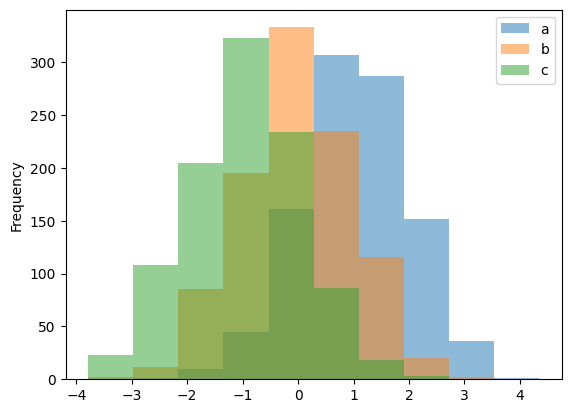

In [8]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

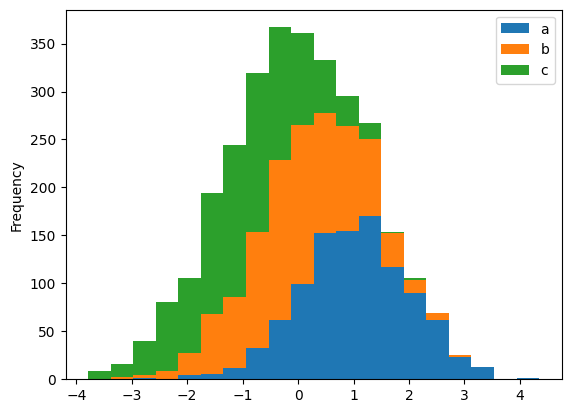

In [9]:
df.plot.hist(stacked=True, bins=20)  # accepts matplotlib arguments

<Axes: xlabel='a', ylabel='b'>

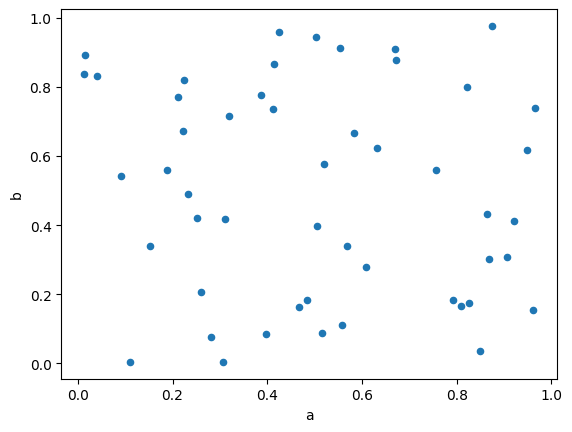

In [10]:
df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

df.plot.scatter(x="a", y="b")  # data argument comes from df

### Exercise

- Read `titanic.tsv` into a dataframe.
- Show age distributions for survived and deceased passengers on a 2x1 figure.

In [59]:
# your code